About Dataset

Datasets contain records of 782 earthquakes from 1/1/2001 to 1/1/2023. The meaning of all columns is as follows:

title: title name given to the earthquake
    
magnitude: The magnitude of the earthquake
    
date_time: date and time
    
cdi: The maximum reported intensity for the event range
    
mmi: The maximum estimated instrumental intensity for the event
    
alert: The alert level - “green”, “yellow”, “orange”, and “red”
    
tsunami: "1" for events in oceanic regions and "0" otherwise
    
sig: A number describing how significant the event is. Larger numbers indicate a more significant event. 
This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated impact
    
net: The ID of a data contributor. Identifies the network considered to be the preferred source of information for this event.
    
nst: The total number of seismic stations used to determine earthquake location.
    
dmin: Horizontal distance from the epicenter to the nearest station
    
gap: The largest azimuthal gap between azimuthally adjacent stations (in degrees). In general, the smaller this number,
the more reliable is the calculated horizontal position of the earthquake. Earthquake locations in which the azimuthal 
gap exceeds 180 degrees typically have large location and depth uncertainties

magType: The method or algorithm used to calculate the preferred magnitude for the event
    
depth: The depth where the earthquake begins to rupture
    
latitude / longitude: coordinate system by means of which the position or location of any place 
on Earth's surface can be determined and described

location: location within the country
    
continent: continent of the earthquake hit country
    
country: affected country


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv('earthquake_data.csv')

In [3]:
df.head(20)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.5960,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.7380,"Bengkulu, Indonesia",NaN,NaN
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.3460,NaN,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.1290,"Neiafu, Tonga",NaN,NaN
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.2780,NaN,NaN,NaN
5,M 7.0 - south of the Fiji Islands,7.0,09-11-2022 09:51,4,3,green,1,755,us,142,4.578,26.0,mwb,660.000,-26.0442,178.3810,the Fiji Islands,NaN,NaN
6,M 6.8 - south of the Fiji Islands,6.8,09-11-2022 09:38,1,3,green,1,711,us,136,4.678,22.0,mww,630.379,-25.9678,178.3630,the Fiji Islands,NaN,NaN
7,"M 6.7 - 60 km SSW of Boca Chica, Panama",6.7,20-10-2022 11:57,7,6,green,1,797,us,145,1.151,37.0,mww,20.000,7.6712,-82.3396,"Boca Chica, Panama",NaN,Panama
8,"M 6.8 - 55 km SSW of Aguililla, Mexico",6.8,22-09-2022 06:16,8,7,yellow,1,1179,us,175,2.137,92.0,mww,20.000,18.3300,-102.9130,"Aguililla, Mexico",North America,Mexico
9,"M 7.6 - 35 km SSW of Aguililla, Mexico",7.6,19-09-2022 18:05,9,8,yellow,1,1799,us,271,1.153,69.0,mww,26.943,18.3667,-103.2520,"Aguililla, Mexico",North America,Mexico


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      782 non-null    object 
 1   magnitude  782 non-null    float64
 2   date_time  782 non-null    object 
 3   cdi        782 non-null    int64  
 4   mmi        782 non-null    int64  
 5   alert      782 non-null    object 
 6   tsunami    782 non-null    int64  
 7   sig        782 non-null    int64  
 8   net        782 non-null    object 
 9   nst        782 non-null    int64  
 10  dmin       782 non-null    float64
 11  gap        782 non-null    float64
 12  magType    782 non-null    object 
 13  depth      782 non-null    float64
 14  latitude   782 non-null    float64
 15  longitude  782 non-null    float64
 16  location   782 non-null    object 
 17  continent  782 non-null    object 
 18  country    782 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 1

In [214]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,0.388747,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199
std,0.445514,3.169939,1.462724,0.487778,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050
50%,6.800000,5.000000,6.000000,0.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000
75%,7.100000,7.000000,7.000000,1.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [4]:
# checking for duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
777    False
778    False
779    False
780    False
781    False
Length: 782, dtype: bool

In [5]:
# checking for missing_values
df.isnull().sum()

title          0
magnitude      0
date_time      0
cdi            0
mmi            0
alert        367
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
location       5
continent    576
country      298
dtype: int64

In [157]:
# dealing with missing values
df['continent'].fillna(method = 'ffill',inplace=True)
df['country'].fillna(method = 'bfill',inplace=True)
df['mmi'].fillna(method = 'bfill',inplace=True)
df['alert'].fillna(value='green', inplace=True)
df['location'].fillna(value='the Fiji Islands', inplace=True)
df.isnull().sum()

title        0
magnitude    0
date_time    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
location     0
continent    0
country      0
dtype: int64

In [6]:
# columns in the data set
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country'],
      dtype='object')

In [7]:
df['date_time'].unique()

array(['22-11-2022 02:03', '18-11-2022 13:37', '12-11-2022 07:09',
       '11-11-2022 10:48', '09-11-2022 10:14', '09-11-2022 09:51',
       '09-11-2022 09:38', '20-10-2022 11:57', '22-09-2022 06:16',
       '19-09-2022 18:05', '18-09-2022 06:44', '17-09-2022 13:41',
       '14-09-2022 11:04', '10-09-2022 23:47', '05-09-2022 04:52',
       '14-08-2022 13:44', '27-07-2022 00:43', '08-06-2022 00:55',
       '26-05-2022 12:02', '19-05-2022 10:13', '10-05-2022 23:06',
       '21-04-2022 07:42', '31-03-2022 05:44', '30-03-2022 20:56',
       '22-03-2022 17:41', '16-03-2022 14:36', '13-03-2022 21:09',
       '02-03-2022 12:52', '16-02-2022 20:21', '03-02-2022 15:58',
       '29-01-2022 02:46', '14-01-2022 09:05', '11-01-2022 12:39',
       '11-01-2022 11:35', '11-01-2022 01:07', '07-01-2022 17:45',
       '29-12-2021 18:25', '14-12-2021 03:20', '28-11-2021 10:52',
       '10-11-2021 15:45', '11-10-2021 09:10', '09-10-2021 10:58',
       '02-10-2021 06:29', '22-09-2021 09:57', '08-09-2021 01:

# Exploratory Data Analysis

# Univariate Analysis

Text(0.5, 1.0, 'MMI')

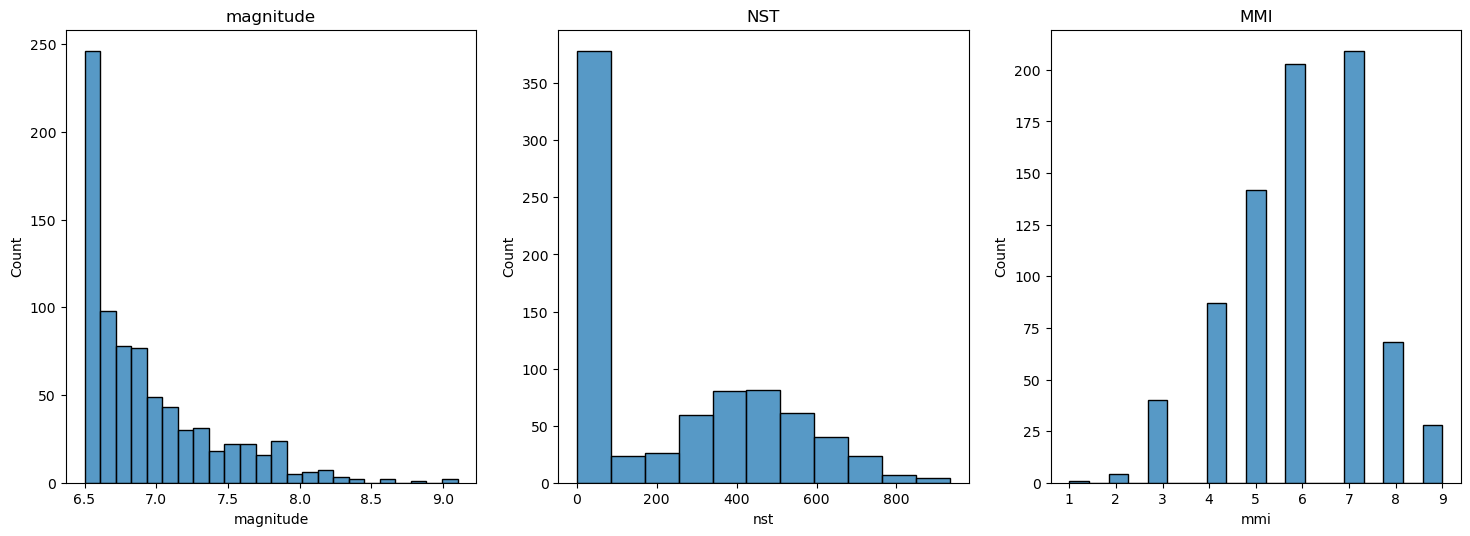

In [158]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6), dpi =100)
sns.histplot(data=df, x ='magnitude', ax=axes[0])
axes[0].set_title('magnitude')

sns.histplot(data=df, x='nst', ax=axes[1])
axes[1].set_title('NST')

sns.histplot(data=df, x = 'mmi', ax=axes[2])
axes[2].set_title('MMI')

Text(0.5, 1.0, 'Depth')

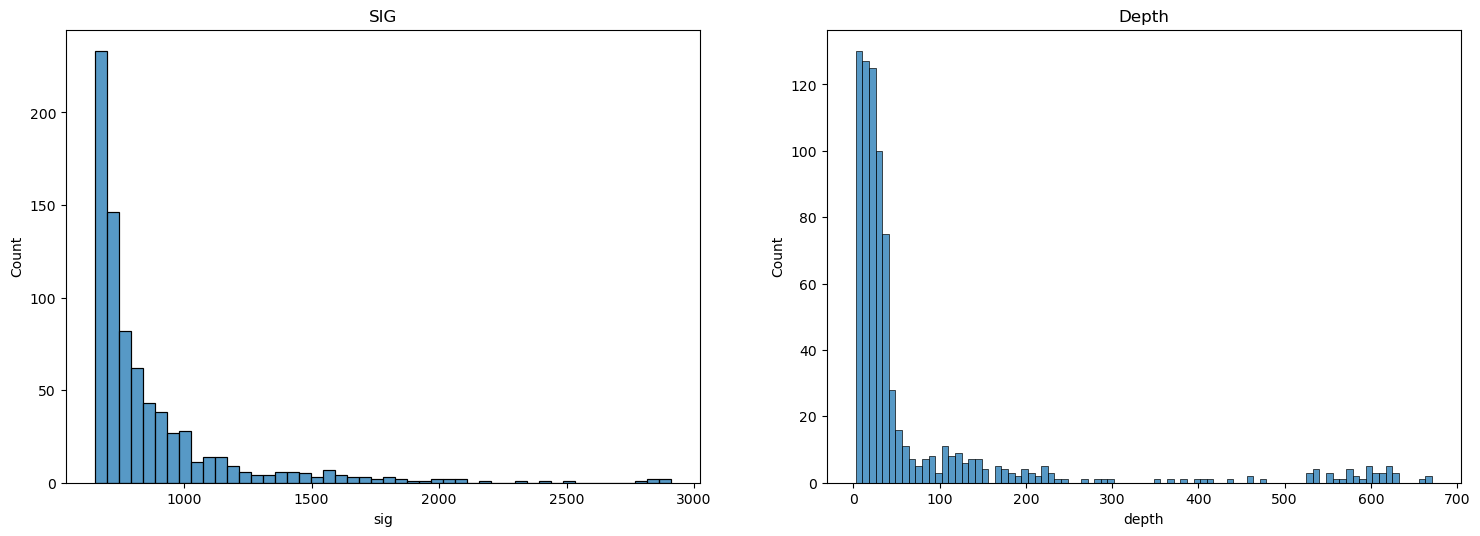

In [159]:
fig, axes =plt.subplots(1, 2, figsize = (18,6), dpi=100)

sns.histplot(data=df, x='sig',ax=axes[0])
axes[0].set_title('SIG')

sns.histplot(data=df, x='depth', ax=axes[1])
axes[1].set_title('Depth')

<AxesSubplot:xlabel='count', ylabel='country'>

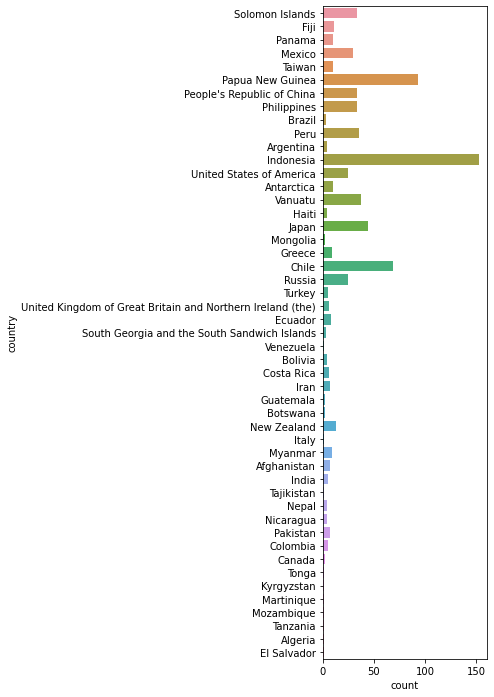

In [160]:
plt.figure(figsize=(10,12))
plt.subplot(1,3,3)
sns.countplot(data = df, y = 'country')

<AxesSubplot:xlabel='continent', ylabel='count'>

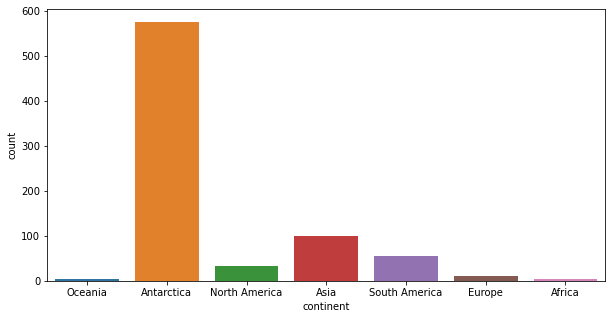

In [163]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'continent')

<AxesSubplot:xlabel='tsunami', ylabel='count'>

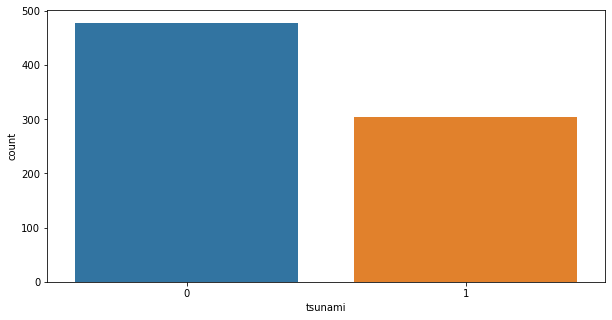

In [164]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'tsunami')

<AxesSubplot:xlabel='count', ylabel='magnitude'>

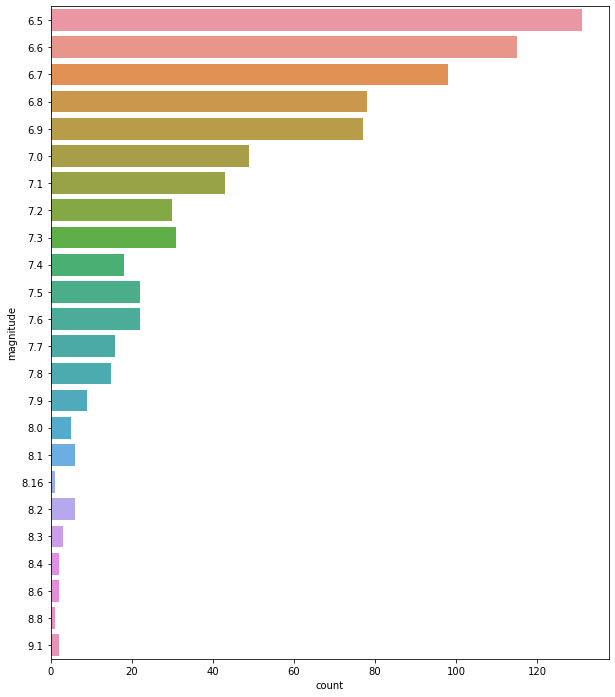

In [165]:
plt.figure(figsize=(10,12))
sns.countplot(data = df, y = 'magnitude')

<AxesSubplot:xlabel='alert', ylabel='count'>

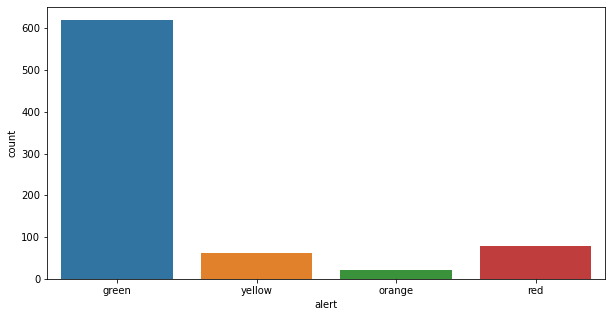

In [166]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'alert')

# Bivariate Data Analysis

<AxesSubplot:xlabel='tsunami', ylabel='country'>

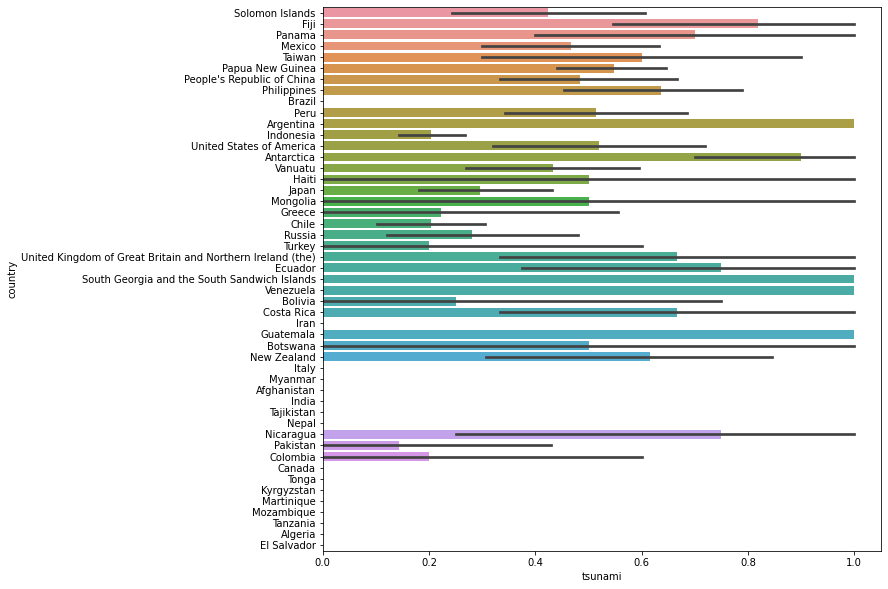

In [167]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='tsunami', y='country')

<AxesSubplot:xlabel='magnitude', ylabel='country'>

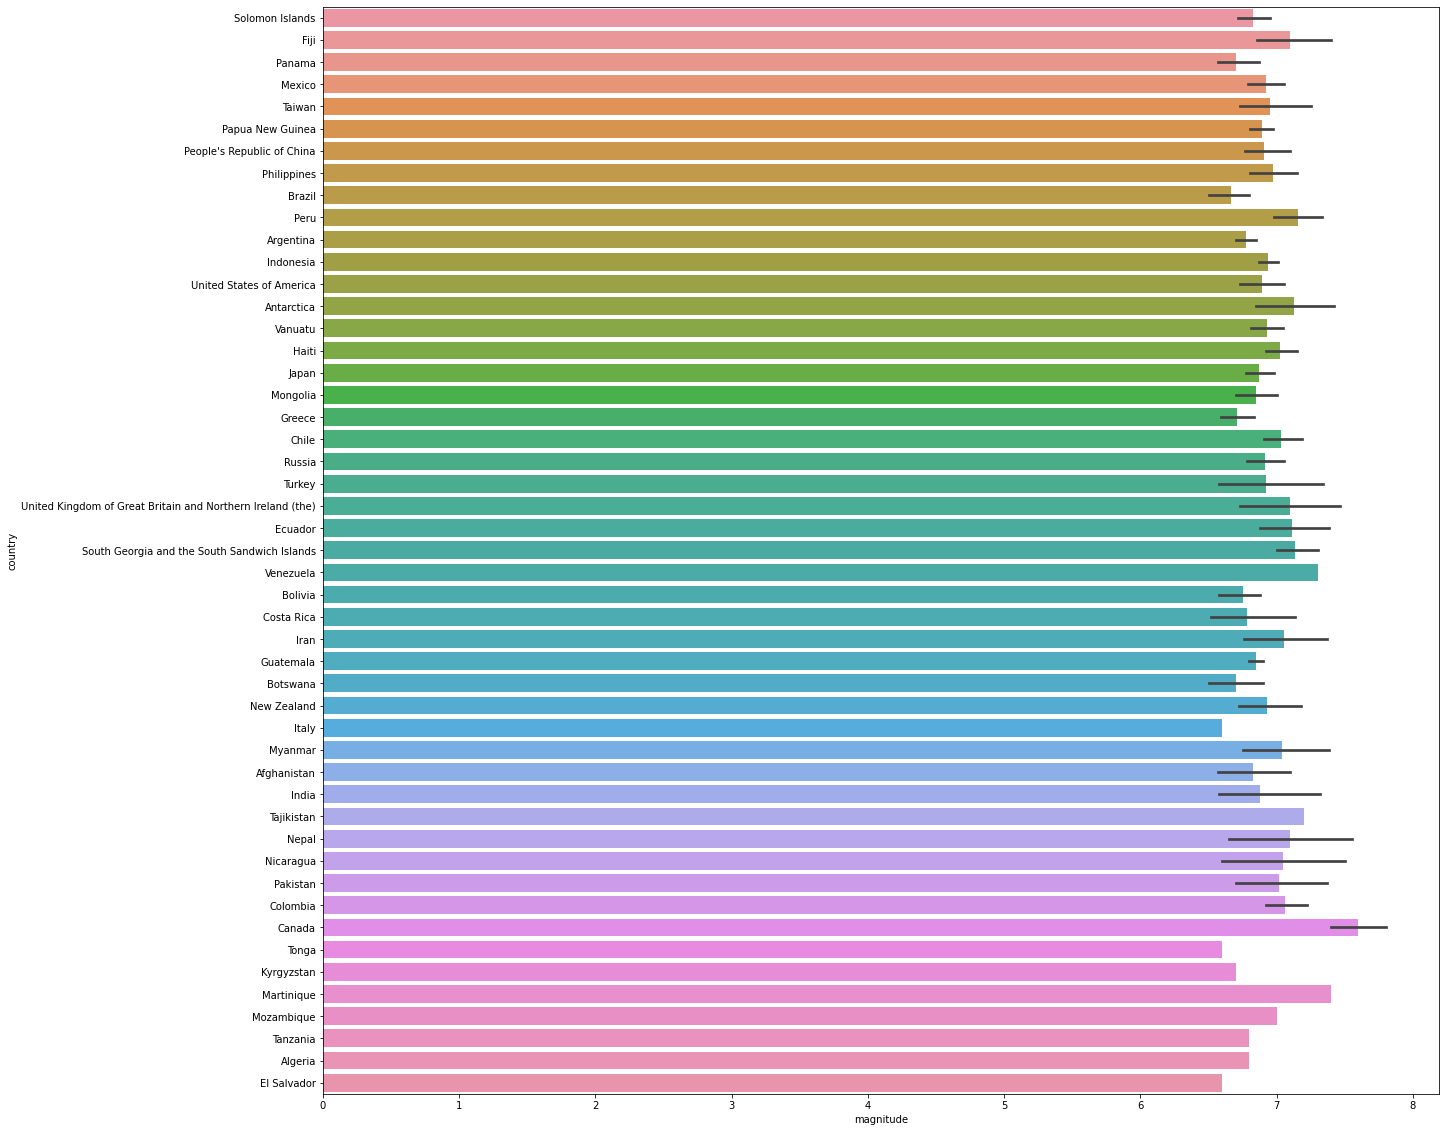

In [168]:
plt.figure(figsize=(20,20))
sns.barplot(data=df, x='magnitude', y='country')

<AxesSubplot:xlabel='magnitude', ylabel='continent'>

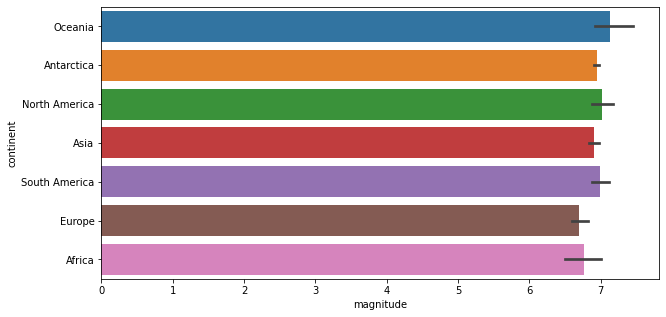

In [169]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='magnitude', y='continent')

<AxesSubplot:xlabel='sig', ylabel='country'>

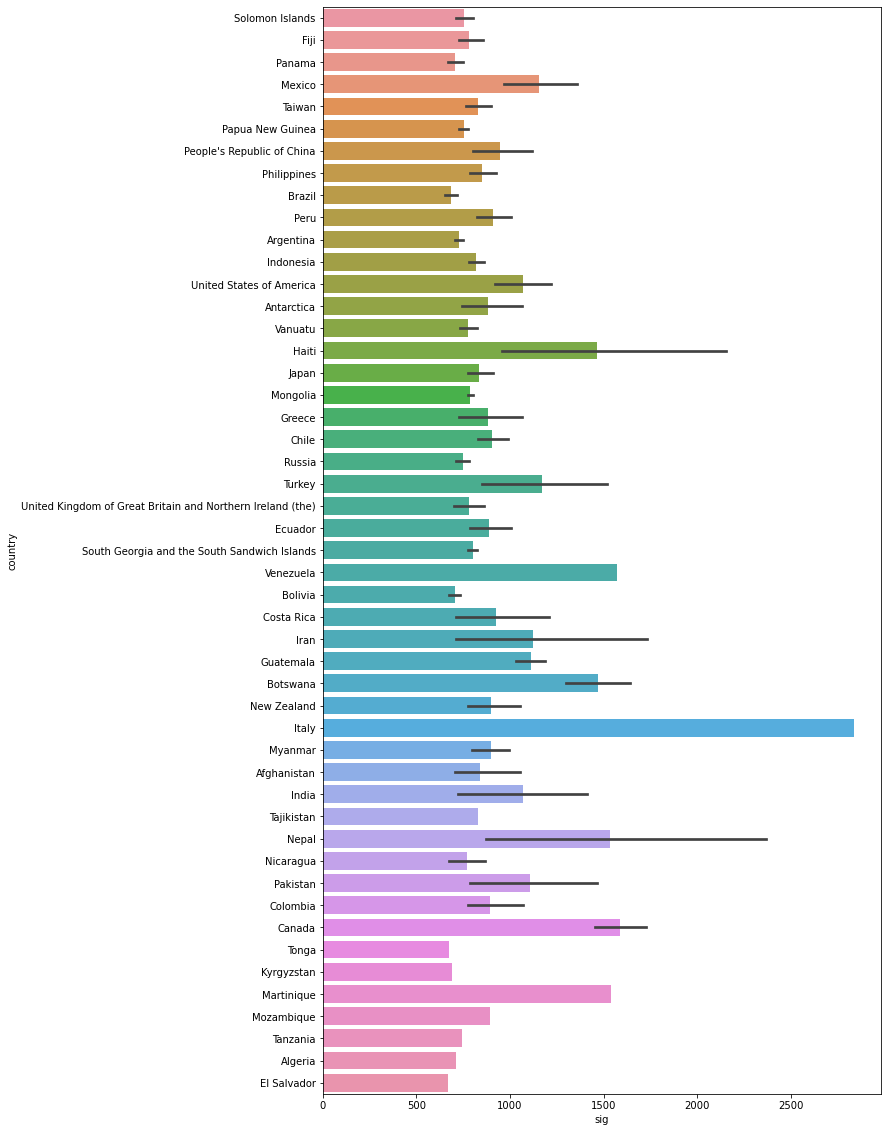

In [170]:
plt.figure(figsize=(10,20))
sns.barplot(data=df, x='sig', y='country')

<AxesSubplot:xlabel='continent', ylabel='sig'>

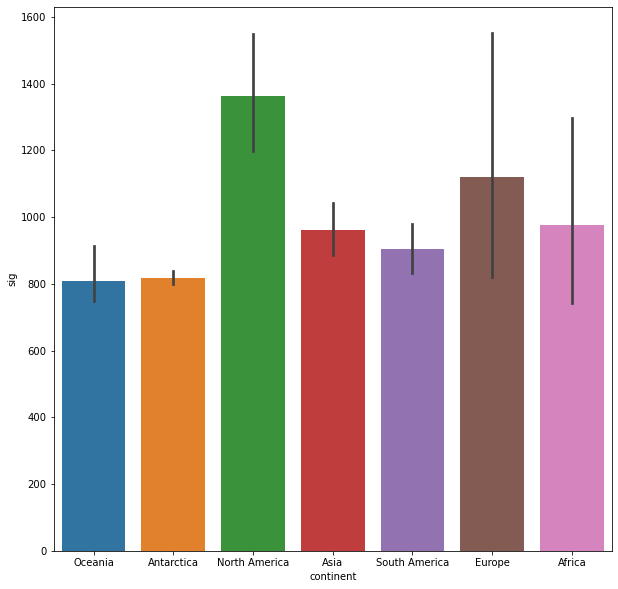

In [171]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, y='sig', x='continent')

<AxesSubplot:xlabel='depth', ylabel='country'>

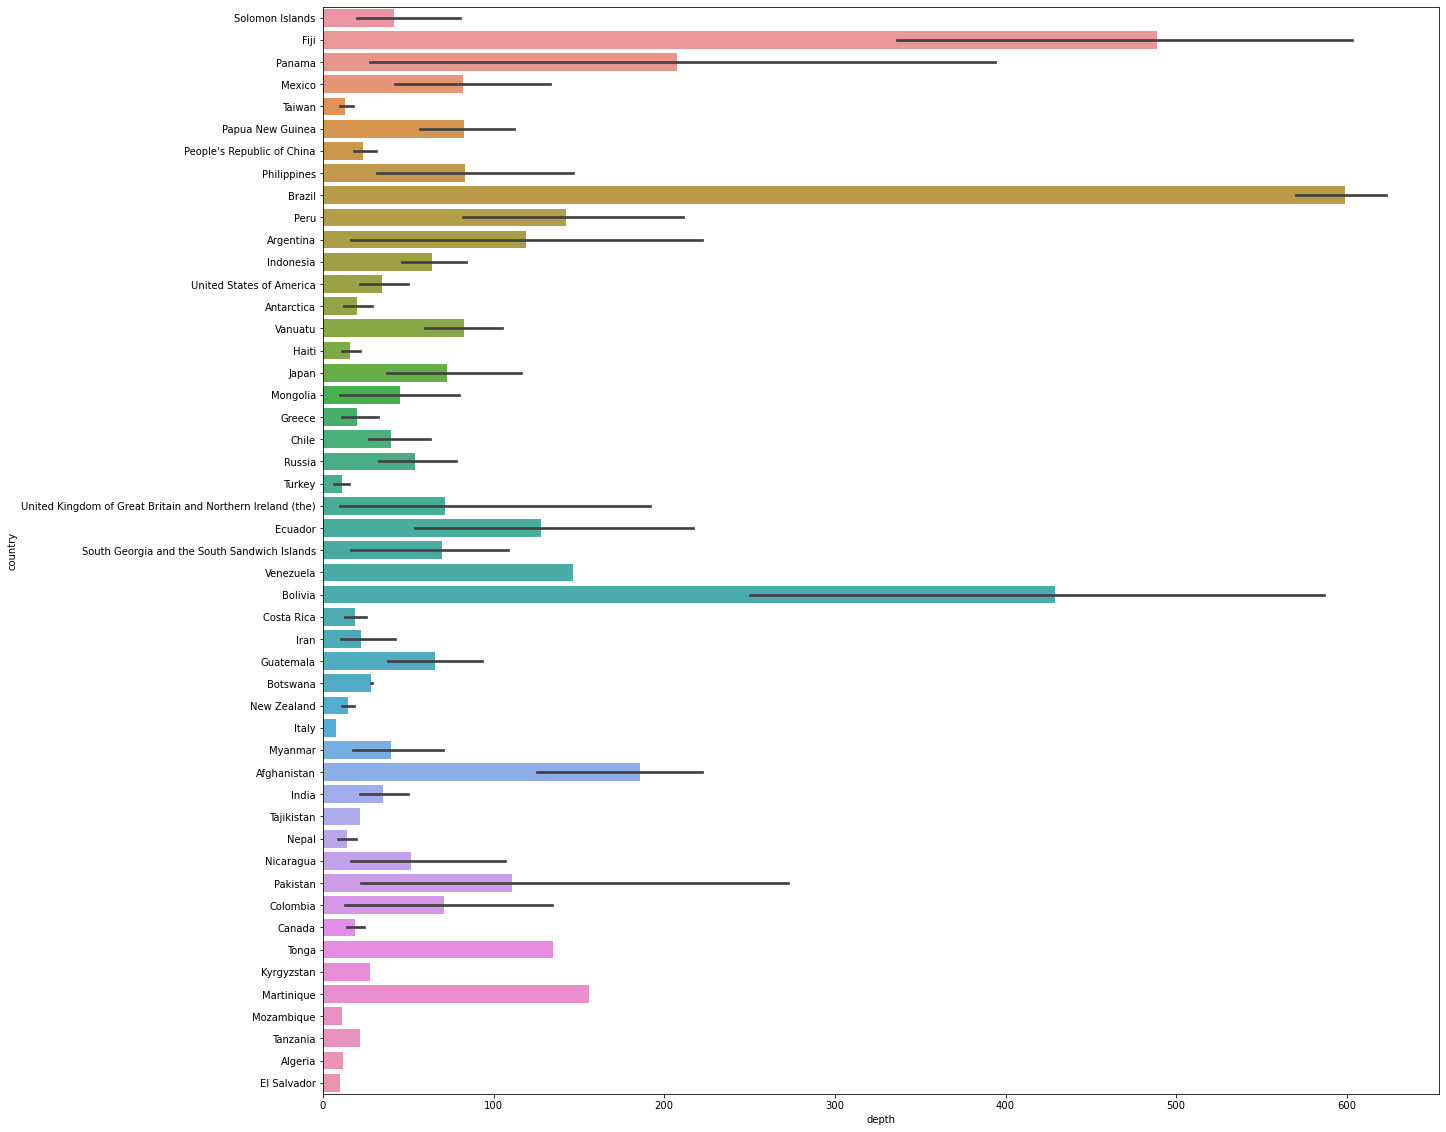

In [172]:
plt.figure(figsize=(20,20))
sns.barplot(data=df, x='depth', y='country')

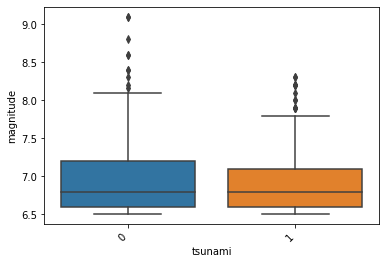

In [173]:
sns.boxplot(data=df, x='tsunami', y='magnitude')
plt.xticks(rotation=45, ha='right');

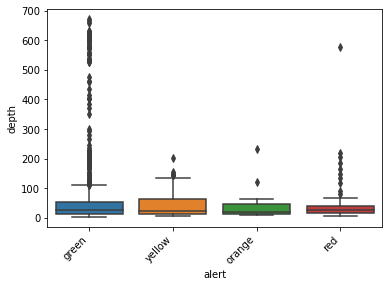

In [174]:
sns.boxplot(data=df, x='alert', y='depth')
plt.xticks(rotation=45, ha='right');

# Multi-Variate Data Analysis

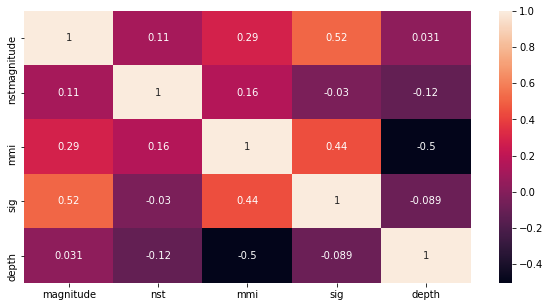

In [175]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df[['magnitude', 'nst', 'mmi', 'sig', 'depth']].corr(), annot=True)
plt.show()

In [215]:
df.corr()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
magnitude,1.000000,0.209549,0.285552,-0.004726,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.008552,-0.013911
cdi,0.209549,1.000000,0.317937,0.160266,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.129003,-0.149048
mmi,0.285552,0.317937,1.000000,-0.147363,0.442423,0.160417,-0.299074,-0.015723,-0.504439,0.144883,-0.005803
tsunami,-0.004726,0.160266,-0.147363,1.000000,-0.015500,-0.600231,0.400752,0.116360,0.056814,-0.113209,-0.136778
sig,0.515871,0.479788,0.442423,-0.015500,1.000000,-0.030100,-0.095318,0.114285,-0.088667,0.204306,-0.190132
nst,0.113114,-0.175417,0.160417,-0.600231,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,0.144204,0.173665
dmin,-0.091403,0.006554,-0.299074,0.400752,-0.095318,-0.529371,1.000000,-0.021933,0.168546,-0.238377,-0.097875
gap,-0.110626,0.098143,-0.015723,0.116360,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.087756,-0.313623
depth,0.030644,-0.097891,-0.504439,0.056814,-0.088667,-0.121982,0.168546,-0.111912,1.000000,-0.069492,-0.036986
latitude,-0.008552,0.129003,0.144883,-0.113209,0.204306,0.144204,-0.238377,0.087756,-0.069492,1.000000,0.026927


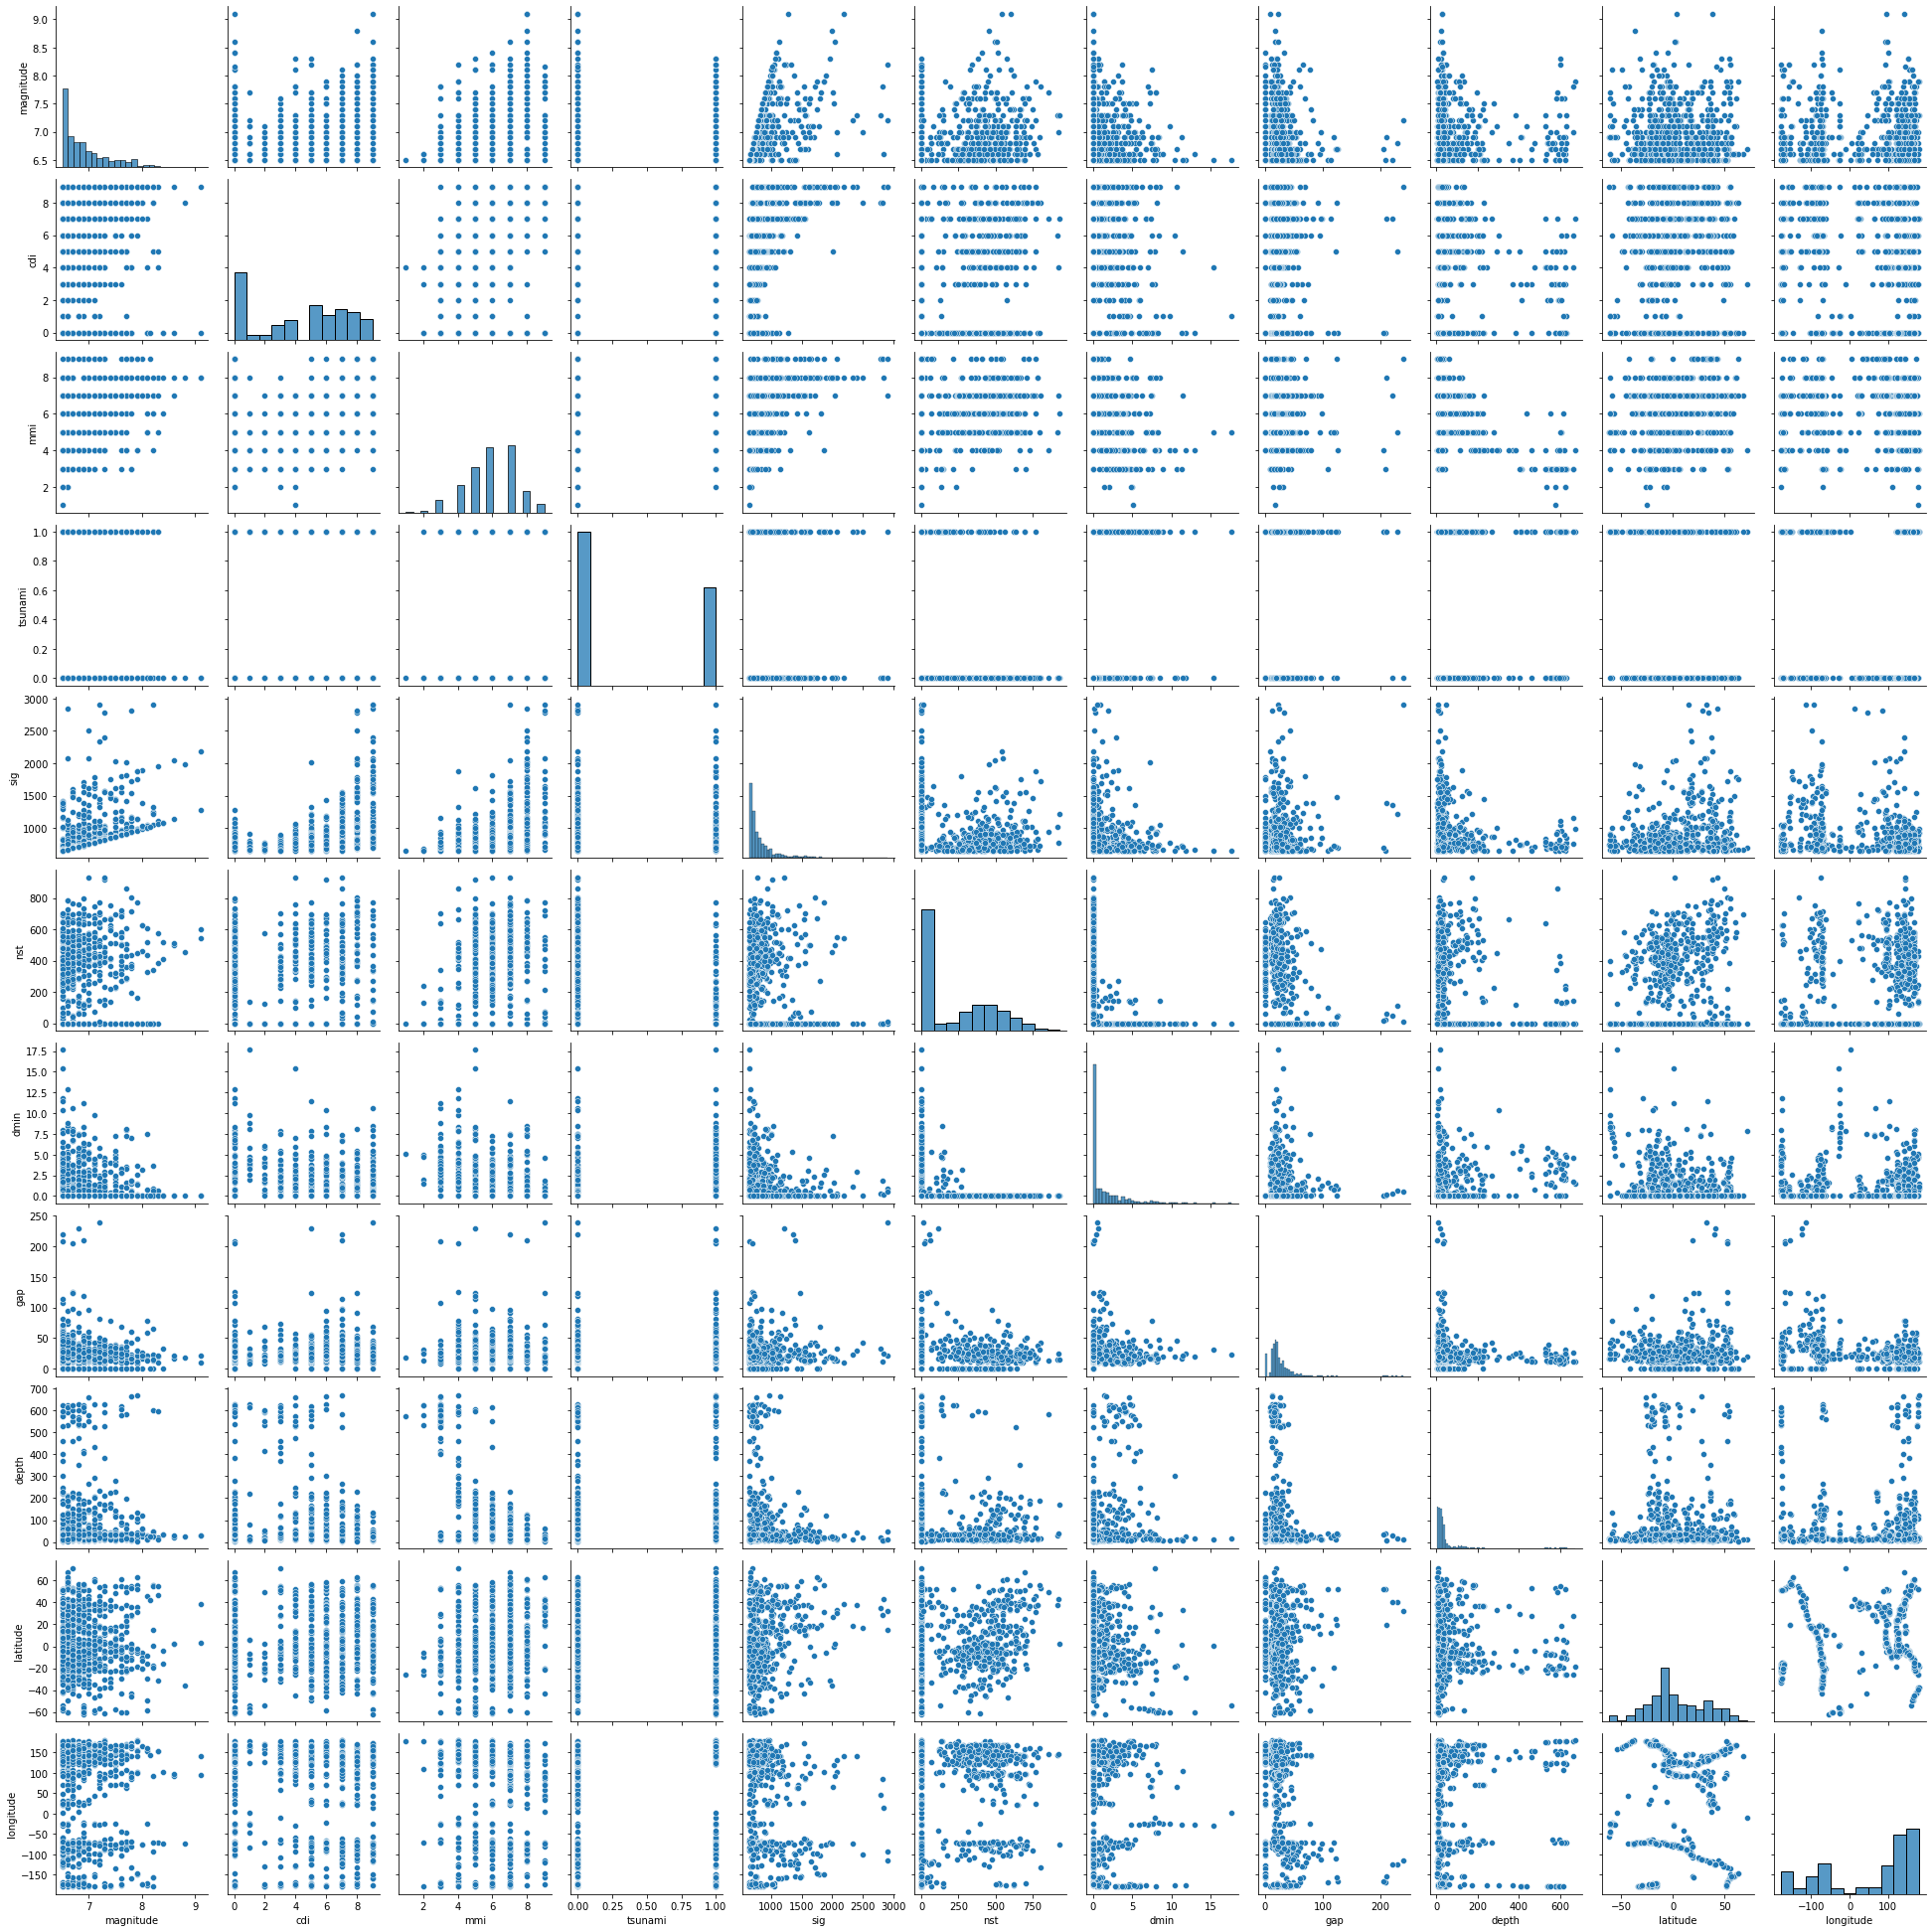

In [176]:
sns.pairplot(df)

# Preparing Data for Modelling


In [177]:
# a copy of the dataset
copy=df.copy()
copy

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,22-11-2022 02:03,8,7,green,1,768,us,117,0.509,17.0,mww,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,18-11-2022 13:37,4,4,green,0,735,us,99,2.229,34.0,mww,25.000,-4.9559,100.738,"Bengkulu, Indonesia",Antarctica,Fiji
2,M 7.0 -,7.0,12-11-2022 07:09,3,3,green,1,755,us,147,3.125,18.0,mww,579.000,-20.0508,-178.346,the Fiji Islands,Oceania,Fiji
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11-11-2022 10:48,5,5,green,1,833,us,149,1.865,21.0,mww,37.000,-19.2918,-172.129,"Neiafu, Tonga",Antarctica,Panama
4,M 6.6 -,6.6,09-11-2022 10:14,0,2,green,1,670,us,131,4.998,27.0,mww,624.464,-25.5948,178.278,the Fiji Islands,Antarctica,Panama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,13-01-2001 17:33,0,8,green,0,912,us,427,0.000,0.0,mwc,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",Antarctica,Vanuatu
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10-01-2001 16:02,5,7,green,0,745,ak,0,0.000,0.0,mw,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,Vanuatu
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,09-01-2001 16:49,0,7,green,0,776,us,372,0.000,0.0,mwb,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",Antarctica,Vanuatu
780,"M 6.8 - Mindanao, Philippines",6.8,01-01-2001 08:54,0,5,green,0,711,us,64,0.000,0.0,mwc,33.000,6.6310,126.899,"Mindanao, Philippines",Antarctica,Philippines


In [178]:
copy['date_time']=pd.to_datetime(copy['date_time'])
copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      782 non-null    object        
 1   magnitude  782 non-null    float64       
 2   date_time  782 non-null    datetime64[ns]
 3   cdi        782 non-null    int64         
 4   mmi        782 non-null    int64         
 5   alert      782 non-null    object        
 6   tsunami    782 non-null    int64         
 7   sig        782 non-null    int64         
 8   net        782 non-null    object        
 9   nst        782 non-null    int64         
 10  dmin       782 non-null    float64       
 11  gap        782 non-null    float64       
 12  magType    782 non-null    object        
 13  depth      782 non-null    float64       
 14  latitude   782 non-null    float64       
 15  longitude  782 non-null    float64       
 16  location   782 non-null    object        
 1

In [179]:
copy['date_time']=pd.DatetimeIndex(copy['date_time']).month

# Label Encoding

In [180]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
copy['alert']=le.fit_transform(copy['alert'])
copy['magType']=le.fit_transform(copy['magType'])
copy['nat']=le.fit_transform(copy['net'])
copy['tsunami']=le.fit_transform(copy['tsunami'])
copy

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,nat
0,"M 7.0 - 18 km SW of Malango, Solomon Islands",7.0,11,8,7,0,1,768,us,117,0.509,17.0,8,14.000,-9.7963,159.596,"Malango, Solomon Islands",Oceania,Solomon Islands,9
1,"M 6.9 - 204 km SW of Bengkulu, Indonesia",6.9,11,4,4,0,0,735,us,99,2.229,34.0,8,25.000,-4.9559,100.738,"Bengkulu, Indonesia",Antarctica,Fiji,9
2,M 7.0 -,7.0,12,3,3,0,1,755,us,147,3.125,18.0,8,579.000,-20.0508,-178.346,the Fiji Islands,Oceania,Fiji,9
3,"M 7.3 - 205 km ESE of Neiafu, Tonga",7.3,11,5,5,0,1,833,us,149,1.865,21.0,8,37.000,-19.2918,-172.129,"Neiafu, Tonga",Antarctica,Panama,9
4,M 6.6 -,6.6,9,0,2,0,1,670,us,131,4.998,27.0,8,624.464,-25.5948,178.278,the Fiji Islands,Antarctica,Panama,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,"M 7.7 - 28 km SSW of Puerto El Triunfo, El Sal...",7.7,1,0,8,0,0,912,us,427,0.000,0.0,7,60.000,13.0490,-88.660,"Puerto El Triunfo, El Salvador",Antarctica,Vanuatu,9
778,"M 6.9 - 47 km S of Old Harbor, Alaska",6.9,10,5,7,0,0,745,ak,0,0.000,0.0,5,36.400,56.7744,-153.281,"Old Harbor, Alaska",North America,Vanuatu,0
779,"M 7.1 - 16 km NE of Port-Olry, Vanuatu",7.1,9,0,7,0,0,776,us,372,0.000,0.0,6,103.000,-14.9280,167.170,"Port-Olry, Vanuatu",Antarctica,Vanuatu,9
780,"M 6.8 - Mindanao, Philippines",6.8,1,0,5,0,0,711,us,64,0.000,0.0,7,33.000,6.6310,126.899,"Mindanao, Philippines",Antarctica,Philippines,9


In [181]:
copy.corr()

,magnitude,date_time,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,magType,depth,latitude,longitude,nat
magnitude,1.000000,0.019214,0.209549,0.285552,0.125286,-0.004726,0.515871,0.113114,-0.091403,-0.110626,0.050542,0.030644,-0.008552,-0.013911,-0.105943
date_time,0.019214,1.000000,0.048498,-0.027998,0.035845,0.001256,0.008660,0.019888,0.027084,0.079773,-0.048874,-0.010736,0.006655,0.012253,-0.043105
cdi,0.209549,0.048498,1.000000,0.317937,0.367660,0.160266,0.479788,-0.175417,0.006554,0.098143,0.243428,-0.097891,0.129003,-0.149048,-0.073884
mmi,0.285552,-0.027998,0.317937,1.000000,0.291251,-0.147363,0.442423,0.160417,-0.299074,-0.015723,-0.061865,-0.504439,0.144883,-0.005803,-0.108195
alert,0.125286,0.035845,0.367660,0.291251,1.000000,0.006812,0.364325,-0.018735,-0.050021,0.035515,0.126950,-0.104303,0.116455,-0.003839,-0.035846
tsunami,-0.004726,0.001256,0.160266,-0.147363,0.006812,1.000000,-0.015500,-0.600231,0.400752,0.116360,0.340445,0.056814,-0.113209,-0.136778,-0.015190
sig,0.515871,0.008660,0.479788,0.442423,0.364325,-0.015500,1.000000,-0.030100,-0.095318,0.114285,0.012673,-0.088667,0.204306,-0.190132,-0.199378
nst,0.113114,0.019888,-0.175417,0.160417,-0.018735,-0.600231,-0.030100,1.000000,-0.529371,-0.118812,-0.327961,-0.121982,0.144204,0.173665,0.130493
dmin,-0.091403,0.027084,0.006554,-0.299074,-0.050021,0.400752,-0.095318,-0.529371,1.000000,-0.021933,0.318009,0.168546,-0.238377,-0.097875,0.097827
gap,-0.110626,0.079773,0.098143,-0.015723,0.035515,0.116360,0.114285,-0.118812,-0.021933,1.000000,-0.291859,-0.111912,0.087756,-0.313623,-0.148506


# Slicing Dataset

In [182]:
x = copy.drop(['title', 'location', 'country', 'continent', 'tsunami', 'net'], axis=1)
y = copy['tsunami']

In [183]:
copy['tsunami'].value_counts()

0    478
1    304
Name: tsunami, dtype: int64

# Feature Scaling

In [184]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.13223459,  1.20520584,  1.15730518, ..., -0.48869077,
         0.90802616,  0.18593205],
       [-0.0923689 ,  1.20520584, -0.10535635, ..., -0.31129555,
         0.40848226,  0.18593205],
       [ 0.13223459,  1.49537547, -0.42102173, ..., -0.86450668,
        -1.96017977,  0.18593205],
       ...,
       [ 0.35683808,  0.62486657, -1.36801788, ..., -0.67676181,
         0.97230876,  0.18593205],
       [-0.31697239, -1.69649049, -1.36801788, ...,  0.11335131,
         0.6305178 ,  0.18593205],
       [ 1.25525204, -1.69649049, -1.36801788, ...,  0.12313656,
         0.62780187,  0.18593205]])

In [185]:
# splitting data in training set and testing set

In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=11, test_size=0.2)

# Building Model

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1], dtype=int64)

# Evaluation Model Performance


In [189]:
# scoring the logistics regression
lr.score(x_test, y_test)


0.7006369426751592

In [133]:
lr.predict_proba(x_test)


array([[0.97868348, 0.02131652],
       [0.95692181, 0.04307819],
       [0.9156733 , 0.0843267 ],
       [0.31664315, 0.68335685],
       [0.2986369 , 0.7013631 ],
       [0.18455858, 0.81544142],
       [0.97240837, 0.02759163],
       [0.97517426, 0.02482574],
       [0.98788893, 0.01211107],
       [0.85158427, 0.14841573],
       [0.93331417, 0.06668583],
       [0.87860216, 0.12139784],
       [0.9493558 , 0.0506442 ],
       [0.16474582, 0.83525418],
       [0.98368015, 0.01631985],
       [0.25019852, 0.74980148],
       [0.98873201, 0.01126799],
       [0.98882591, 0.01117409],
       [0.96099217, 0.03900783],
       [0.9654776 , 0.0345224 ],
       [0.77327696, 0.22672304],
       [0.10901409, 0.89098591],
       [0.9806815 , 0.0193185 ],
       [0.97980968, 0.02019032],
       [0.15173741, 0.84826259],
       [0.28866404, 0.71133596],
       [0.98583549, 0.01416451],
       [0.18886547, 0.81113453],
       [0.9687181 , 0.0312819 ],
       [0.68795818, 0.31204182],
       [0.

In [131]:
# importing confusion matrix 
from sklearn.metrics import confusion_matrix

In [132]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[78 20]
 [14 45]]


In [134]:
# Visualizing confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

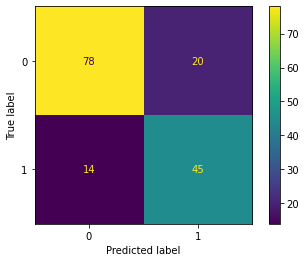

In [135]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [136]:
# Getting the precision which is the ratio  of the true positive (TP) to the to the total predicted positive
from sklearn.metrics import precision_score

In [137]:
precision_test = precision_score(y_test,y_pred)
precision_test

0.6923076923076923

In [138]:
# Getting the recall which is the number of true positive to the total actual positive
from sklearn.metrics import recall_score


In [139]:
recall_test = recall_score(y_test,y_pred)
recall_test

0.7627118644067796

In [140]:
# Getting a general report view
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        98
           1       0.69      0.76      0.73        59

    accuracy                           0.78       157
   macro avg       0.77      0.78      0.77       157
weighted avg       0.79      0.78      0.79       157



# Naive_bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [32]:
predictions=nb.predict(x_test)
predictions

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1], dtype=int64)

# Evaluation Model Performance


In [192]:
from sklearn.metrics import accuracy_score
ac2=accuracy_score(y_test,predictions)*100
ac2

77.70700636942675

In [190]:
nb.predict_proba(x_test)

array([[9.99835076e-01, 1.64924231e-04],
       [9.72522531e-01, 2.74774694e-02],
       [6.98580522e-01, 3.01419478e-01],
       [2.64650326e-02, 9.73534967e-01],
       [2.25299189e-03, 9.97747008e-01],
       [8.39119790e-04, 9.99160880e-01],
       [9.99999462e-01, 5.37811640e-07],
       [9.99845228e-01, 1.54771759e-04],
       [9.99999337e-01, 6.62644052e-07],
       [9.17967834e-01, 8.20321657e-02],
       [9.99986536e-01, 1.34638442e-05],
       [9.99999998e-01, 2.42777314e-09],
       [9.35039135e-01, 6.49608653e-02],
       [3.65881035e-05, 9.99963412e-01],
       [9.99838733e-01, 1.61266937e-04],
       [9.27404542e-01, 7.25954576e-02],
       [1.00000000e+00, 1.60785026e-16],
       [9.99983494e-01, 1.65060811e-05],
       [9.74489706e-01, 2.55102940e-02],
       [9.96225678e-01, 3.77432173e-03],
       [1.16106608e-04, 9.99883893e-01],
       [1.87092927e-02, 9.81290707e-01],
       [9.99999068e-01, 9.31969325e-07],
       [9.99921271e-01, 7.87288493e-05],
       [2.426141

In [116]:
# scoring the naive_bayes
nb.score(x_test, y_test)

0.7770700636942676

In [193]:
# importing confusion matrix 
from sklearn.metrics import confusion_matrix

In [194]:
cm = confusion_matrix(y_test, predictions)
print(cm)


[[77 21]
 [14 45]]


In [195]:
# Visualizing confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

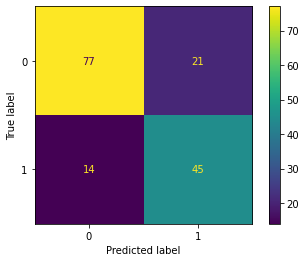

In [196]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [197]:
# Getting the precision which is the ratio  of the true positive (TP) to the to the total predicted positive
from sklearn.metrics import precision_score

In [198]:
precision_test = precision_score(y_test,predictions)
precision_test


0.6818181818181818

In [199]:
# Getting the recall which is the number of true positive to the total actual positive
from sklearn.metrics import recall_score

In [200]:
recall_test = recall_score(y_test,predictions)
recall_test

0.7627118644067796

In [201]:
# Getting a general report view
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        98
           1       0.68      0.76      0.72        59

    accuracy                           0.78       157
   macro avg       0.76      0.77      0.77       157
weighted avg       0.78      0.78      0.78       157



# Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=11)

In [102]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=11, max_leaf_nodes=6)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_leaf_nodes=6, random_state=11)

In [103]:
predict = model.predict(X_test)
predict

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1], dtype=int64)

In [104]:
# let's do hyperparameter turning for Random Forest GridSearchCV and fit the data
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [105]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params, 
cv =4, n_jobs=-1, verbose=1, scoring='accuracy')

In [78]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Wall time: 55.5 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [79]:
grid_search.best_score_

0.8975992160705536

In [80]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

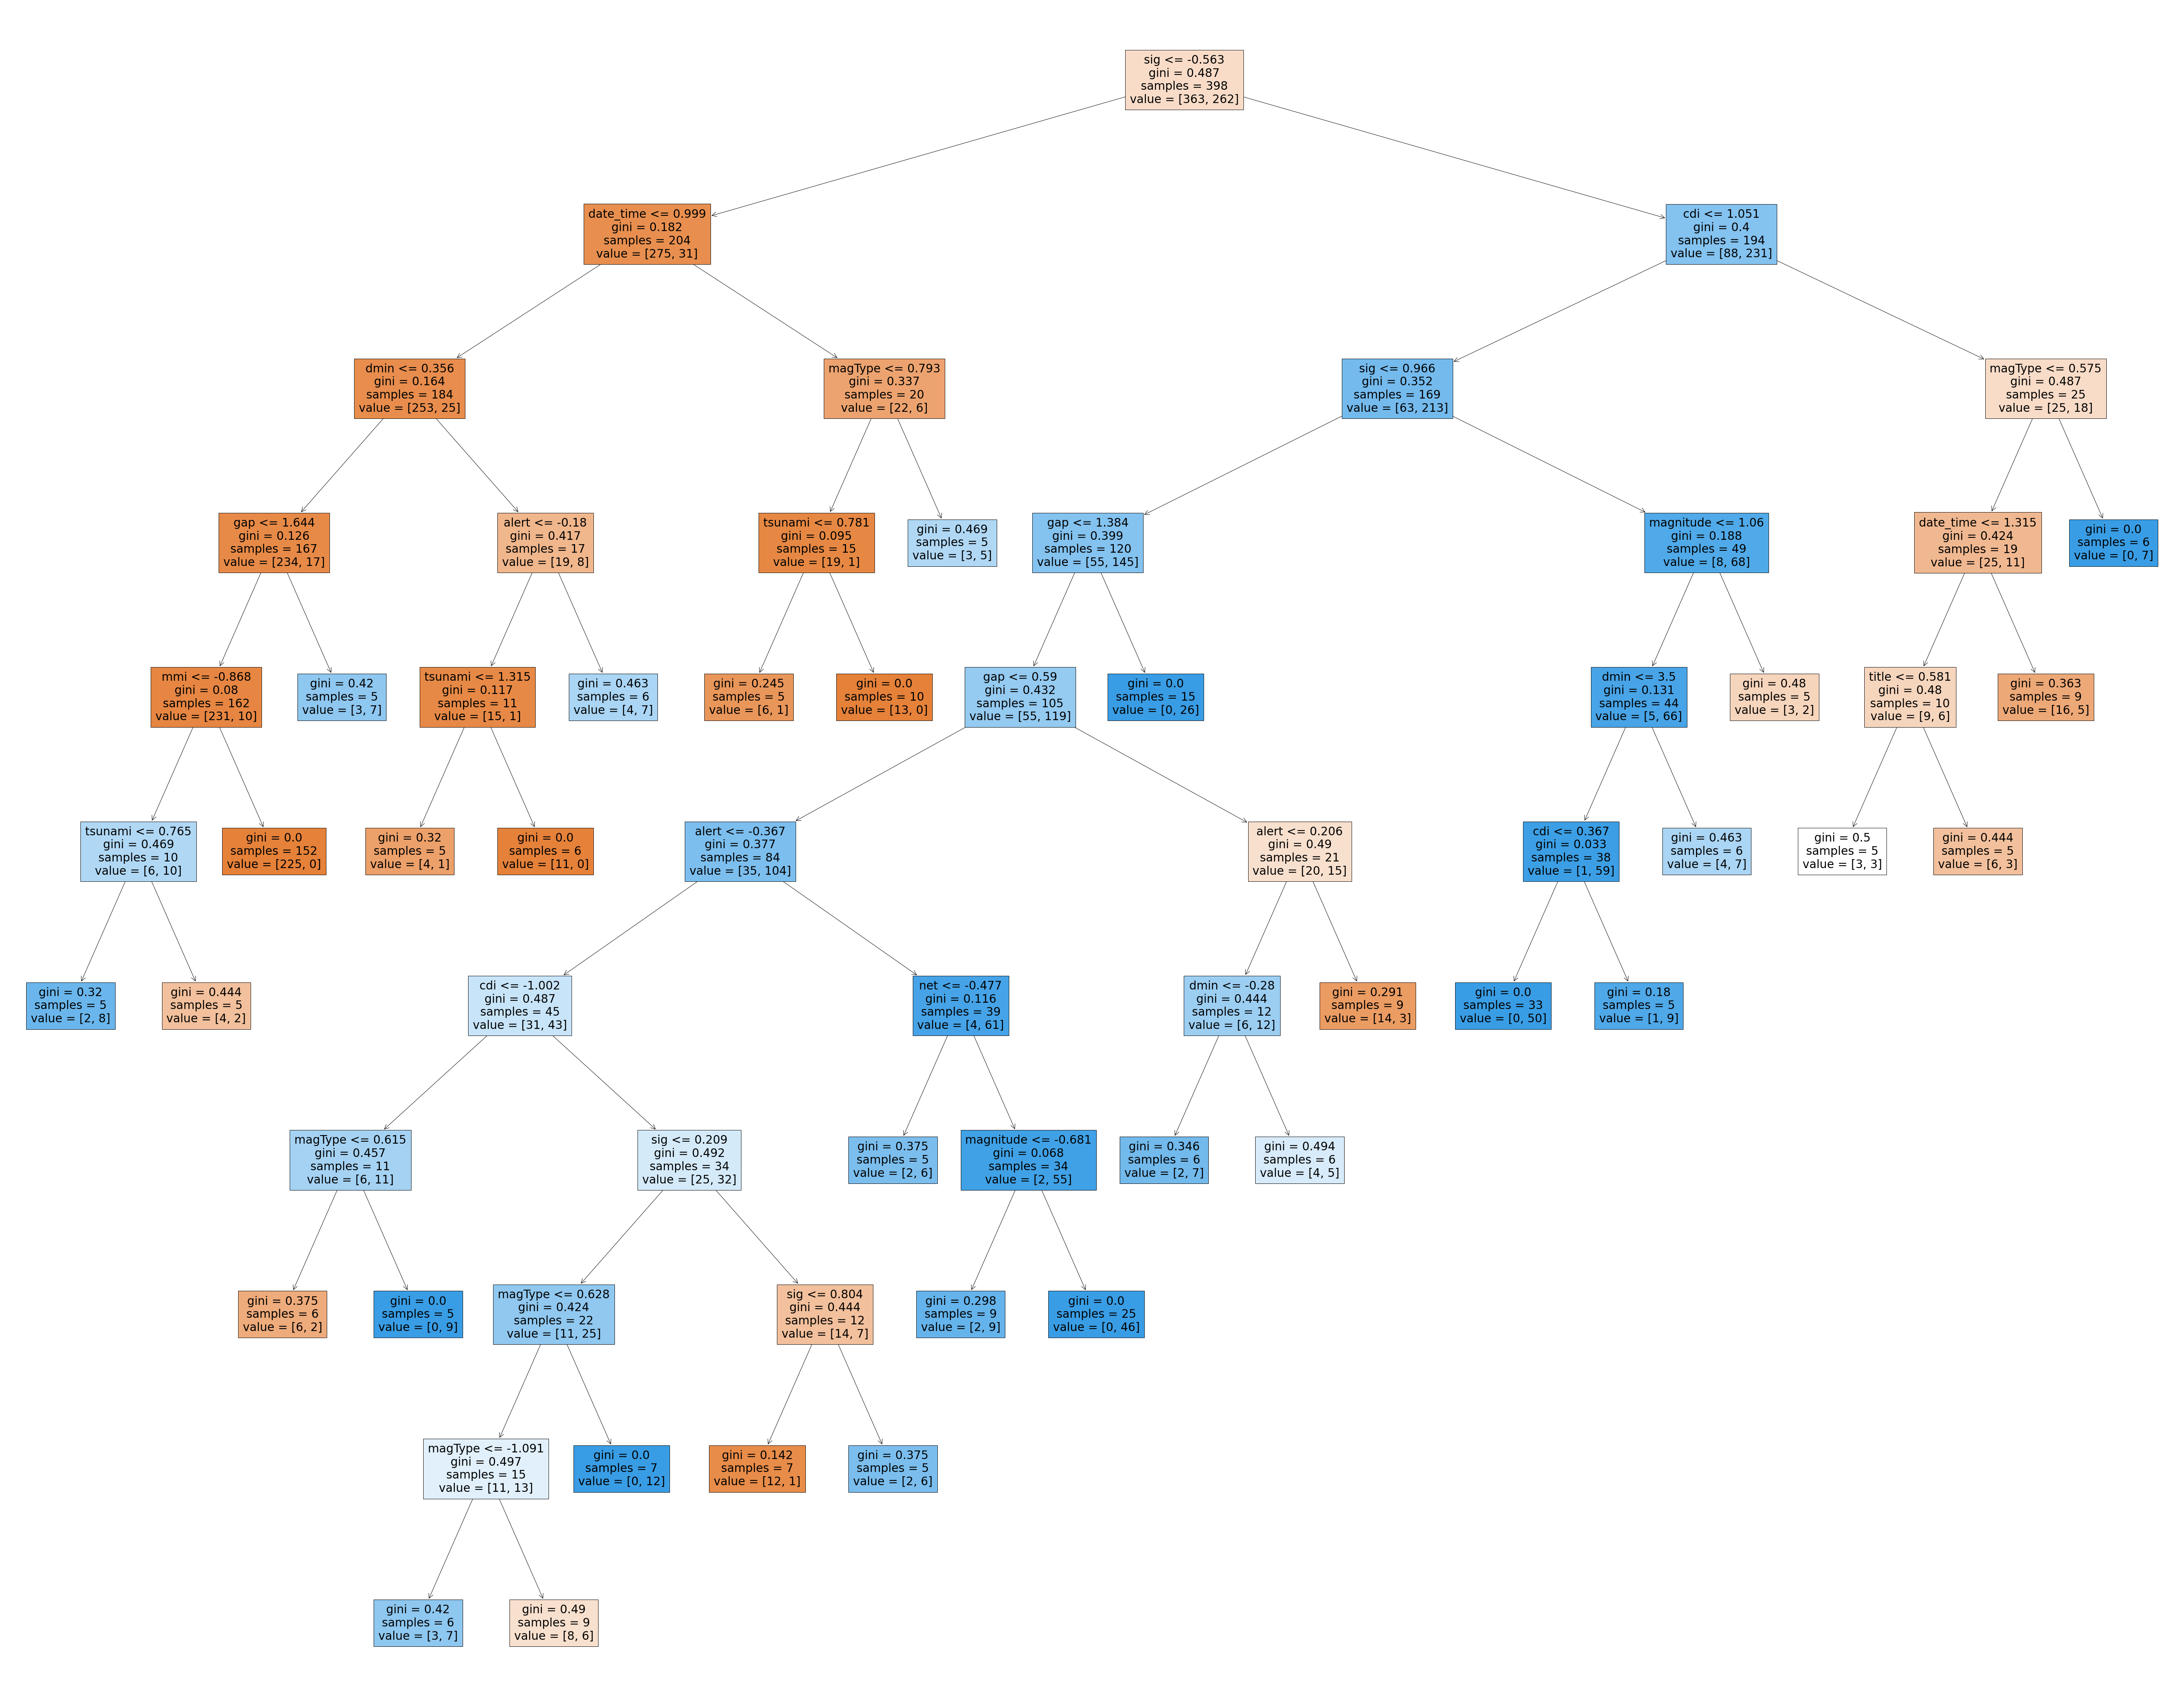

In [81]:
# Now, let's visualize
from sklearn.tree import plot_tree
plt.figure(figsize=(100,80))
plot_tree(rf_best.estimators_[5], feature_names = df.columns,  filled=True);

# Evaluation Model Performance

In [202]:
# scoring the Random Forest Model
model.score(x_test, y_test)

0.45222929936305734

In [204]:
# importing confusion matrix 
from sklearn.metrics import confusion_matrix

In [205]:
cm = confusion_matrix(y_test, predict)
print(cm)

[[78 20]
 [ 6 53]]


In [206]:
# Visualizing confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

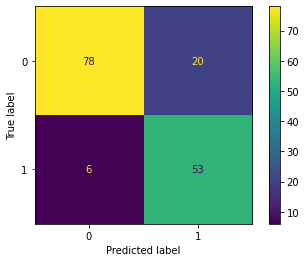

In [207]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [208]:
# Getting the precision which is the ratio  of the true positive (TP) to the to the total predicted positive
from sklearn.metrics import precision_score

In [209]:
precision_test = precision_score(y_test,predict)
precision_test

0.726027397260274

In [210]:
# Getting the recall which is the number of true positive to the total actual positive
from sklearn.metrics import recall_score

In [211]:
recall_test = recall_score(y_test,predict)
recall_test

0.8983050847457628

In [212]:
# Getting a general report view
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        98
           1       0.73      0.90      0.80        59

    accuracy                           0.83       157
   macro avg       0.83      0.85      0.83       157
weighted avg       0.85      0.83      0.84       157



In [88]:
train_accuracy = accuracy_score(y_test, predict)
print('The train accuracy :' , round(train_accuracy * 100, 3), '%')

The train accuracy : 83.439 %


In [111]:
features = x.columns
importances = classifier.feature_importances_
sorted_indices = np.argsort(importances)[:: -1]
for i in range(x_train.shape[1]):
    print(i +1,  features[sorted_indices[i]], ':', importances[sorted_indices[i]])

1 alert : 0.22035159644834398
2 dmin : 0.185881239262137
3 nst : 0.1447428910294375
4 longitude : 0.11512374900129446
5 magType : 0.10230529370542374
6 latitude : 0.05767961910854098
7 depth : 0.03308883213074459
8 gap : 0.03039197026249894
9 mmi : 0.027694577750930257
10 sig : 0.027370262249826048
11 cdi : 0.01951350901392561
12 magnitude : 0.0177772630735586
13 date_time : 0.014564398765033204
14 nat : 0.0035147981983050343


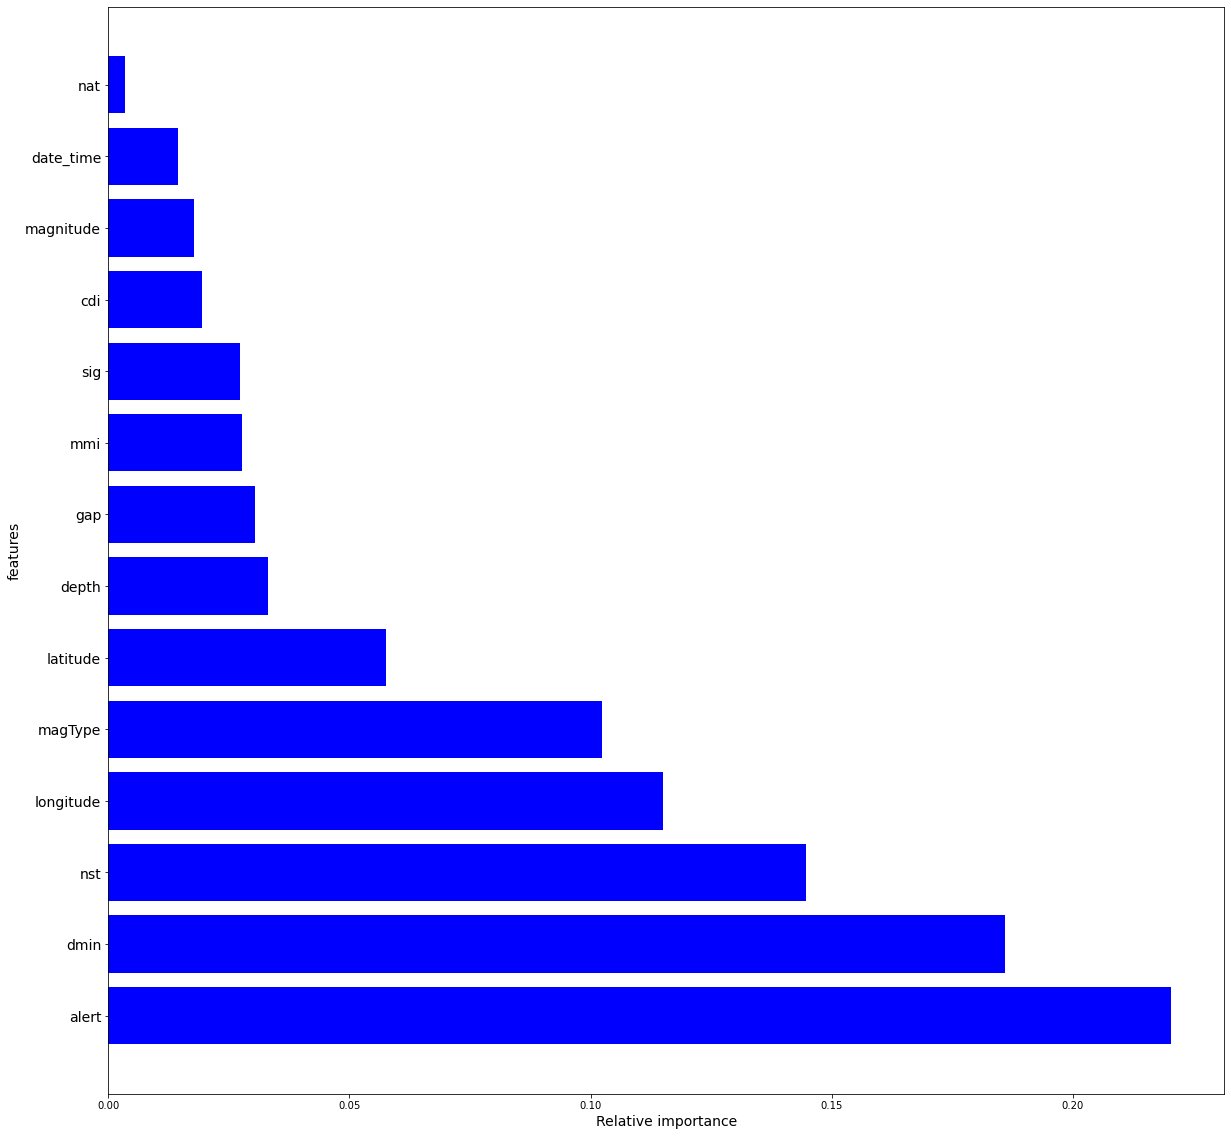

In [112]:
plt.figure(figsize = (20,20))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], color = 'b')
plt.yticks(range(len(sorted_indices)), [features[i] for i in sorted_indices], fontsize = 14)
plt.xlabel('Relative importance', fontsize = 14)
plt.ylabel('features', fontsize = 14)
plt.show()

# SUPPORT VECTOR MACHINE (SVM)

In [142]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)


SVC()

In [143]:
svm_model.score(x_test, y_test)

0.8471337579617835

In [145]:
y_pred1 = svm_model.predict(x_test)
y_pred1

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [146]:
train_accuracy = accuracy_score(y_test, y_pred1)
print('The train accuracy :' , round(train_accuracy * 100, 3), '%')

The train accuracy : 84.713 %


In [147]:
cm_2 = confusion_matrix(y_test, y_pred1)
print(cm_2)

[[82 16]
 [ 8 51]]


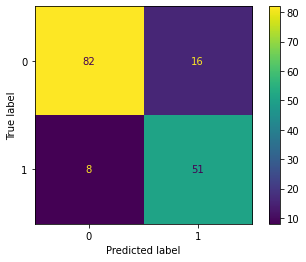

In [148]:
# visualizing the confusion matrix
cm_2_display = ConfusionMatrixDisplay(cm_2).plot()

In [150]:
# Getting the classification report
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.91      0.84      0.87        98
           1       0.76      0.86      0.81        59

    accuracy                           0.85       157
   macro avg       0.84      0.85      0.84       157
weighted avg       0.85      0.85      0.85       157



# CONCLUSION


four different model was used for this project and their accuracy and precision was compared. the accuracy of the model was ranked as

SUPPORT VECTOR MACHINE > RANDOM FOREST > LOGISTIC REGRESSION > NAIVE BAYES